### Market Basket Analysis
---

* What products are purchased together most frequently?
* How should the products be organized and positioned in the store?
* How do we identify the best products to discount via coupons?




Installing the following libraries
* matplotlib.pyplot, which is used to plot the results of the models.
* mlxtend.frequent_patterns, which is used to run the models;
* mlxtend.preprocessing, which is used to encode and prep the data for the models;
* numpy, which is used to work with arrays;
* pandas, which is used to work with DataFrames.

In [1]:
pip install mlxtend


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install openpyxl

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
import matplotlib.pyplot as plt
import mlxtend.frequent_patterns
import mlxtend.preprocessing
import numpy as np
import pandas as pd

In [4]:


df =pd.read_excel('Online Retail.xlsx')
df.head()

C:\Users\manem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\openpyxl\packaging\core.py:99: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  now = datetime.datetime.utcnow()
C:\Users\manem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\openpyxl\packaging\core.py:99: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  now = datetime.datetime.utcnow()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:

df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [6]:
df.InvoiceNo.value_counts()

InvoiceNo
573585     1114
581219      749
581492      731
580729      721
558475      705
           ... 
554023        1
554022        1
554021        1
554020        1
C558901       1
Name: count, Length: 25900, dtype: int64

In [7]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [8]:

print(df.shape)
print(df['InvoiceDate'].nunique())
print(df['CustomerID'].nunique())


(541909, 8)
23260
4372


 Data Cleaning and Formatting:

a. Creating an indicator column stipulating whether the invoice number begins with "C". Called the column "IsCPresent"

In [9]:
df['IsCPresent'] = df['InvoiceNo'].fillna(False).astype(str).str.startswith('C')


df['IsCPresent'] = df['IsCPresent'].astype(int)

df.head()



,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,IsCPresent
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0


In InvoiceNo there are NaN's are replaced with False.


- Filtering out all transactions having either zero or a negative number of items (in other words, items were returned),
- Removing all invoice numbers starting with "C" using the column created in previous step
- Subsetting the DataFrame down to InvoiceNo and Description
- Dropping all rows with at least one missing value.
- Renaming the DataFrame online1 and print out the first 10 rows of the filtered DataFrame, online1.

In [10]:

df_filtered = df[df['Quantity'] > 0]

df_filtered = df_filtered[~(df_filtered['InvoiceNo'].str.startswith('C') | df_filtered['InvoiceNo'].isna())]


df_filtered = df_filtered[['InvoiceNo', 'Description']]


df_filtered = df_filtered.dropna()


online1 = df_filtered.copy()

online1.head(10)



,InvoiceNo,Description
0,536365,WHITE HANGING HEART T-LIGHT HOLDER
1,536365,WHITE METAL LANTERN
2,536365,CREAM CUPID HEARTS COAT HANGER
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE
4,536365,RED WOOLLY HOTTIE WHITE HEART.
5,536365,SET 7 BABUSHKA NESTING BOXES
6,536365,GLASS STAR FROSTED T-LIGHT HOLDER
7,536366,HAND WARMER UNION JACK
8,536366,HAND WARMER RED POLKA DOT
9,536367,ASSORTED COLOUR BIRD ORNAMENT



11216 rows and 5764 invoice numbers have been removed.
--




In [11]:


original_rows = df.shape[0]
original_invoice_numbers = df['InvoiceNo'].nunique()


filtered_rows = online1.shape[0]
filtered_invoice_numbers = online1['InvoiceNo'].nunique()


rows_removed = original_rows - filtered_rows
invoice_numbers_removed = original_invoice_numbers - filtered_invoice_numbers

print("Approximately, {} rows and {} invoice numbers have been removed.".format(rows_removed, invoice_numbers_removed))


Approximately, 11216 rows and 5764 invoice numbers have been removed.



- Extracting the invoice numbers from the DataFrame as a list.
- Removing duplicate elements to create a list of unique invoice numbers.

In [12]:


invoice_numbers_list = online1['InvoiceNo'].tolist()


unique_invoice_numbers = list(set(invoice_numbers_list))

print("Length of the list of unique invoice numbers:", len(unique_invoice_numbers))




Length of the list of unique invoice numbers: 20136


Taking the list from above step and cut it to only include the first 5,000 elements.

In [13]:


first_5000_invoice_numbers = unique_invoice_numbers[:5000]


len(first_5000_invoice_numbers)


5000

Filtering the online1 DataFrame down by only keeping the invoice numbers in the list and print out the first 10 rows of online1

In [14]:


online1_filtered = online1[online1['InvoiceNo'].isin(first_5000_invoice_numbers)]


online1_filtered.head(10)


,InvoiceNo,Description
0,536365,WHITE HANGING HEART T-LIGHT HOLDER
1,536365,WHITE METAL LANTERN
2,536365,CREAM CUPID HEARTS COAT HANGER
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE
4,536365,RED WOOLLY HOTTIE WHITE HEART.
5,536365,SET 7 BABUSHKA NESTING BOXES
6,536365,GLASS STAR FROSTED T-LIGHT HOLDER
7,536366,HAND WARMER UNION JACK
8,536366,HAND WARMER RED POLKA DOT
9,536367,ASSORTED COLOUR BIRD ORNAMENT


Printing out the dimensions of the DataFrame (online1) and the number of unique invoice numbers to confirm that the filtering and cleaning process was successful

In [15]:

print("Dimensions of the DataFrame (online1):", online1.shape)


unique_invoice_numbers_online1 = online1['InvoiceNo'].nunique()
print("Number of unique invoice numbers in online1:", unique_invoice_numbers_online1)


Dimensions of the DataFrame (online1): (530693, 2)
Number of unique invoice numbers in online1: 20136


In [16]:
online1.head()

,InvoiceNo,Description
0,536365,WHITE HANGING HEART T-LIGHT HOLDER
1,536365,WHITE METAL LANTERN
2,536365,CREAM CUPID HEARTS COAT HANGER
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE
4,536365,RED WOOLLY HOTTIE WHITE HEART.


In [17]:
first_5000_invoice_numbers

['A563187',
 536365,
 536366,
 536367,
 536368,
 536369,
 536370,
 536371,
 536372,
 536373,
 536374,
 536375,
 536376,
 536377,
 536378,
 536380,
 536381,
 536382,
 536384,
 536385,
 536386,
 536387,
 536388,
 536389,
 536390,
 536392,
 536393,
 536394,
 536395,
 536396,
 536397,
 536398,
 536399,
 536400,
 536401,
 536402,
 536403,
 536404,
 536405,
 536406,
 536407,
 536408,
 536409,
 536412,
 536415,
 536416,
 536420,
 536423,
 536425,
 536437,
 536446,
 536460,
 536463,
 536464,
 536466,
 536477,
 536488,
 536500,
 536502,
 536508,
 536514,
 536520,
 536521,
 536522,
 536523,
 536524,
 536525,
 536526,
 536527,
 536528,
 536529,
 536530,
 536531,
 536532,
 536533,
 536534,
 536535,
 536536,
 536537,
 536538,
 536539,
 536540,
 536541,
 536542,
 536544,
 536551,
 536555,
 536556,
 536557,
 536558,
 536559,
 536560,
 536561,
 536562,
 536563,
 536564,
 536565,
 536566,
 536567,
 536568,
 536569,
 536570,
 536571,
 536572,
 536573,
 536574,
 536575,
 536576,
 536577,
 536578,
 536579

In [18]:
invoice_item_list = []

for invoice_number in first_5000_invoice_numbers:
    
    items_for_invoice = online1.loc[online1['InvoiceNo'] == invoice_number, 'Description'].tolist()
    
    invoice_item_list.append(items_for_invoice)

for i in range(4):
    print(invoice_item_list[i])


['Adjust bad debt']
['WHITE HANGING HEART T-LIGHT HOLDER', 'WHITE METAL LANTERN', 'CREAM CUPID HEARTS COAT HANGER', 'KNITTED UNION FLAG HOT WATER BOTTLE', 'RED WOOLLY HOTTIE WHITE HEART.', 'SET 7 BABUSHKA NESTING BOXES', 'GLASS STAR FROSTED T-LIGHT HOLDER']
['HAND WARMER UNION JACK', 'HAND WARMER RED POLKA DOT']
['ASSORTED COLOUR BIRD ORNAMENT', "POPPY'S PLAYHOUSE BEDROOM ", "POPPY'S PLAYHOUSE KITCHEN", 'FELTCRAFT PRINCESS CHARLOTTE DOLL', 'IVORY KNITTED MUG COSY ', 'BOX OF 6 ASSORTED COLOUR TEASPOONS', 'BOX OF VINTAGE JIGSAW BLOCKS ', 'BOX OF VINTAGE ALPHABET BLOCKS', 'HOME BUILDING BLOCK WORD', 'LOVE BUILDING BLOCK WORD', 'RECIPE BOX WITH METAL HEART', 'DOORMAT NEW ENGLAND']


## Data Encoding

While cleaning the data is crucial, the most important part of the data preparation process is molding the data into the correct form. 

In [19]:
# write your code here

from mlxtend.preprocessing import TransactionEncoder

encoder = TransactionEncoder()

encoder.fit(invoice_item_list)


encoded_data = encoder.transform(invoice_item_list)

print(encoded_data[:5])  # Print the first 5 transactions as an example


[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


Recasting the encoded array as a DataFrame named online_encoder_df. Printing the predefined subset of the DataFrame that features both True and False values

In [20]:


online_encoder_df = pd.DataFrame(encoded_data, columns=encoder.columns_)


online_encoder_df.head(10)


,4 PURPLE FLOCK DINNER CANDLES,OVAL WALL MIRROR DIAMANTE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,*Boombox Ipod Classic,*USB Office Mirror Ball,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,...,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC HEART LATTICE TRAY OVAL,ZINC METAL HEART DECORATION,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,amazon,amazon sales,found,rcvd be air temp fix for dotcom sit,wrongly sold (22719) barcode
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [21]:
online_encoder_df.shape

(5000, 3136)

#### The data is now prepared for modeling.
---

### Wholesale Data

we will analyze a dataset containing data on various customers' annual spending amounts (reported in monetary units) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

In [22]:
import pandas as pd
import numpy as np
from numpy.linalg import inv
from numpy.random import uniform, multivariate_normal, rand, randn, seed
from itertools import repeat
from time import time
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import gridspec
from matplotlib.colors import to_rgba
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.neighbors import LocalOutlierFactor
from scipy.stats import jarque_bera, normaltest
import matplotlib.pyplot as plt
import scipy.stats as stats


In [23]:

cus_df=pd.read_csv('wholesale_customers_data.csv')
cus_df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


Dropping columns Channel & Region 

In [ ]:


cus_df = cus_df.drop(columns=['Channel', 'Region'])

print(cus_df.columns)


Index(['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper',
       'Delicatessen'],
      dtype='object')


### Data Exploration:

 exploring the data through visualizations and code to understand how each feature is related to the others.



In [25]:

cus_df.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


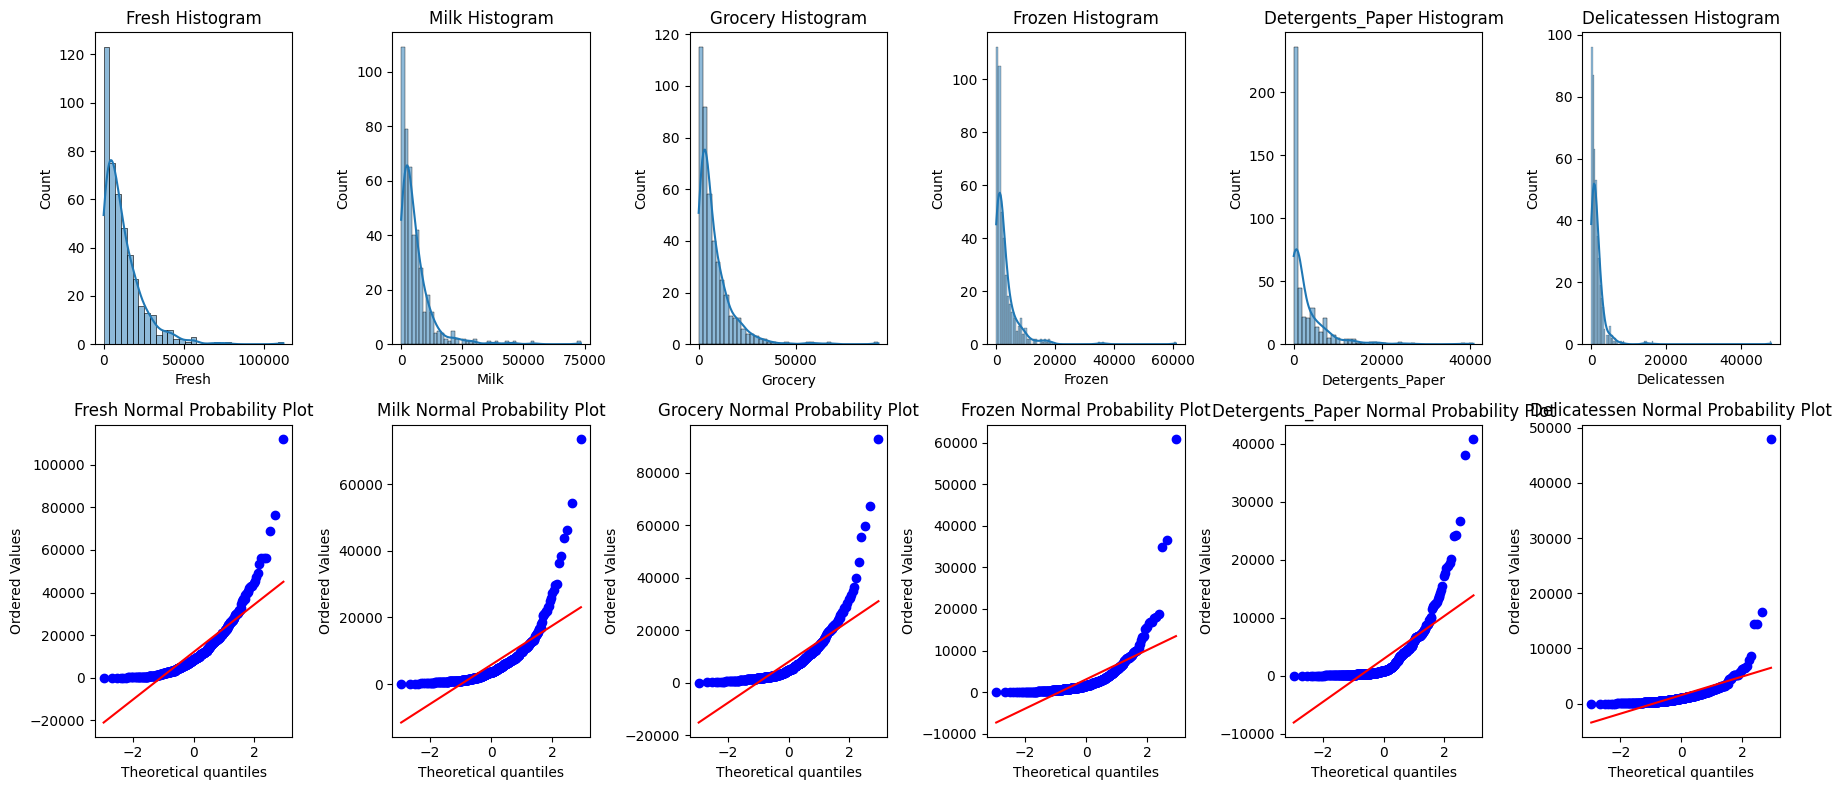

In [26]:


fig, axes = plt.subplots(nrows=2, ncols=6, figsize=(18, 8))

# Loop through columns and create plots

for i, column in enumerate(cus_df.columns):
    sns.histplot(cus_df[column], ax=axes[0, i], kde=True)
    axes[0, i].set_title(f'{column} Histogram')

for i, column in enumerate(cus_df.columns):
    stats.probplot(cus_df[column], dist="norm", plot=axes[1, i])
    axes[1, i].get_lines()[1].set_color('r') 
    axes[1, i].set_title(f'{column} Normal Probability Plot')

plt.tight_layout()
plt.show()




The histograms for each feature show that most of the data is concentrated towards the lower values, indicating a right-skewed distribution. The normal probability plots further confirm this, showing deviations from the red line, particularly in the tails, suggesting that the distributions are not perfectly normal.
Most of the purchases fall into lower spending categories for each product type, and the distributions don't look like perfect bell curves.


 Scaling the sample data using the natural logarithm 

In [27]:
cus_df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [28]:
# Scaling the data using the natural logarithm

scaled_data = np.log(cus_df)


scaled_data.head()


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9.446913,9.175335,8.930759,5.365976,7.891331,7.198931
1,8.861775,9.191158,9.166179,7.474205,8.099554,7.482119
2,8.756682,9.083416,8.946896,7.785305,8.165079,8.967504
3,9.492884,7.086738,8.347827,8.764678,6.228511,7.488853
4,10.026369,8.596004,8.881558,8.272571,7.482682,8.553525


Outliers checking using box plots

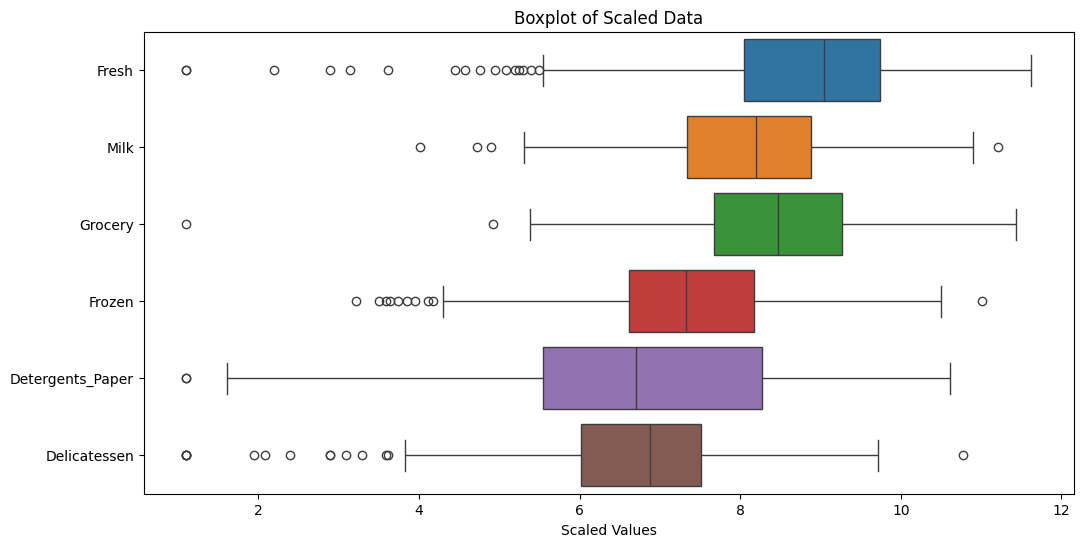

In [ ]:

plt.figure(figsize=(12, 6))
sns.boxplot(data=scaled_data, orient="h")
plt.title('Boxplot of Scaled Data')
plt.xlabel('Scaled Values')
plt.show()

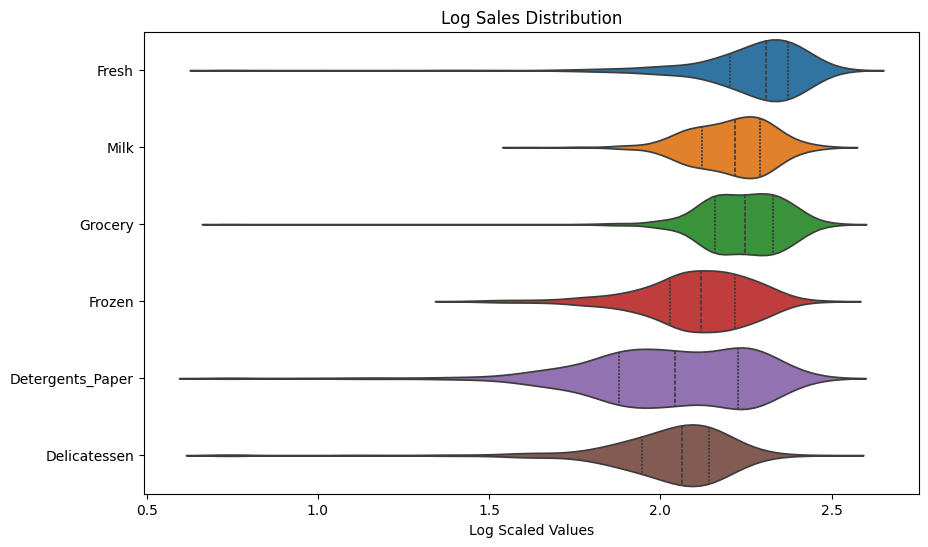

In [ ]:

log_scaled_data = np.log1p(scaled_data)

# Plotting the log sales distribution using a violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(data=log_scaled_data, orient="h", inner="quartile")
plt.title('Log Sales Distribution')
plt.xlabel('Log Scaled Values')
plt.show()

 Removing Outliers using LocalOutlierFactor and plotting the Log Sales Distribution using violinplot after removing the outliers

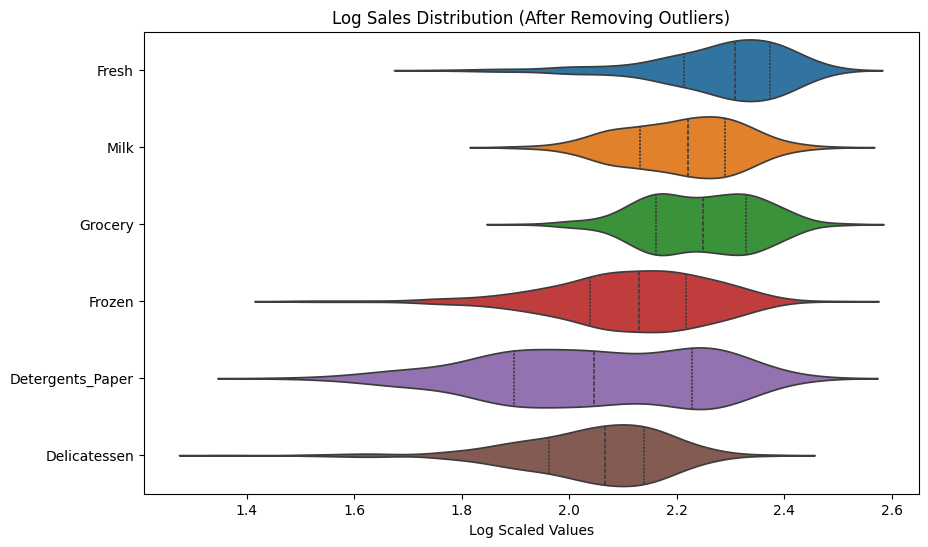

In [31]:



lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)

outlier_labels = lof.fit_predict(log_scaled_data)

filtered_data = log_scaled_data[outlier_labels != -1]

plt.figure(figsize=(10, 6))
sns.violinplot(data=filtered_data, orient="h", inner="quartile")
plt.title('Log Sales Distribution (After Removing Outliers)')
plt.xlabel('Log Scaled Values')
plt.show()


using sns.pairplot to visualize Feature Distributions 

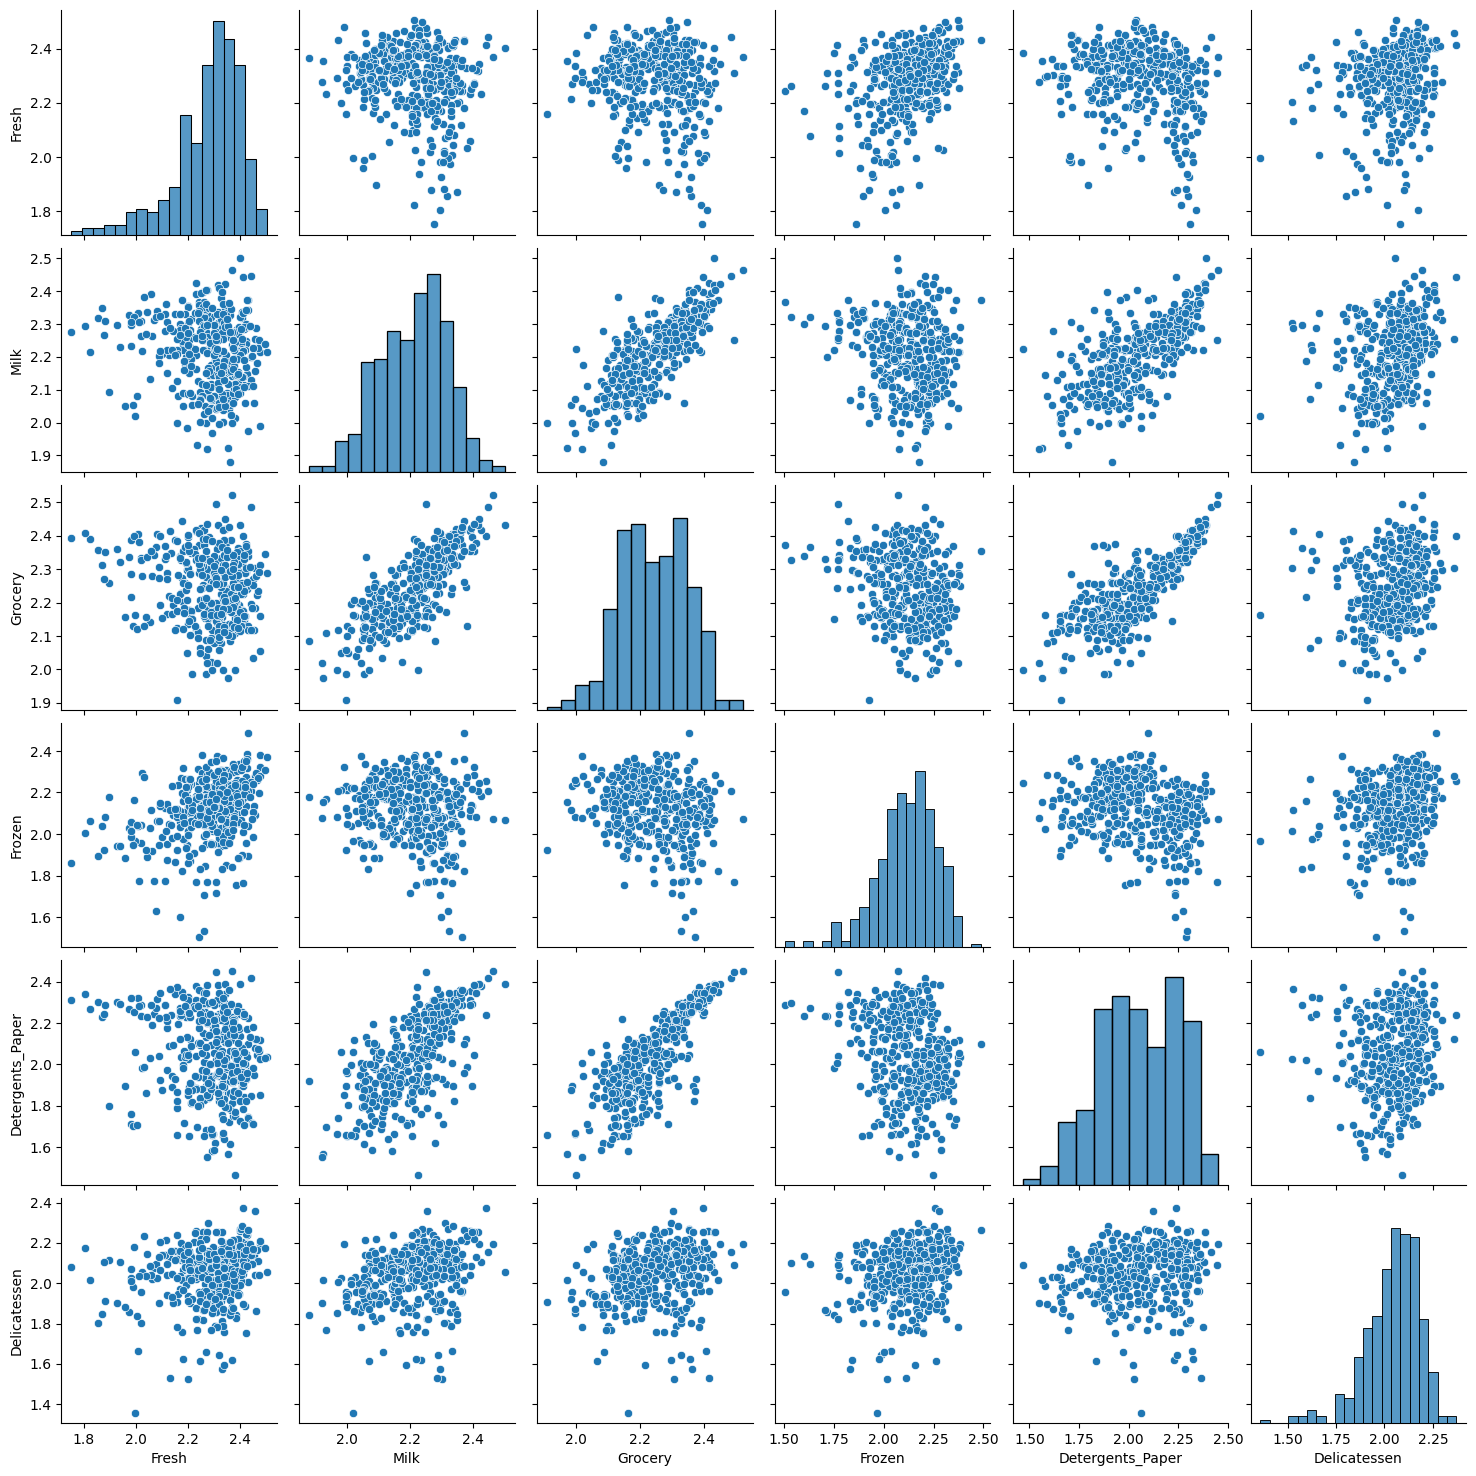

In [32]:

sns.pairplot(filtered_data)
plt.show()

<Figure size 1000x800 with 0 Axes>

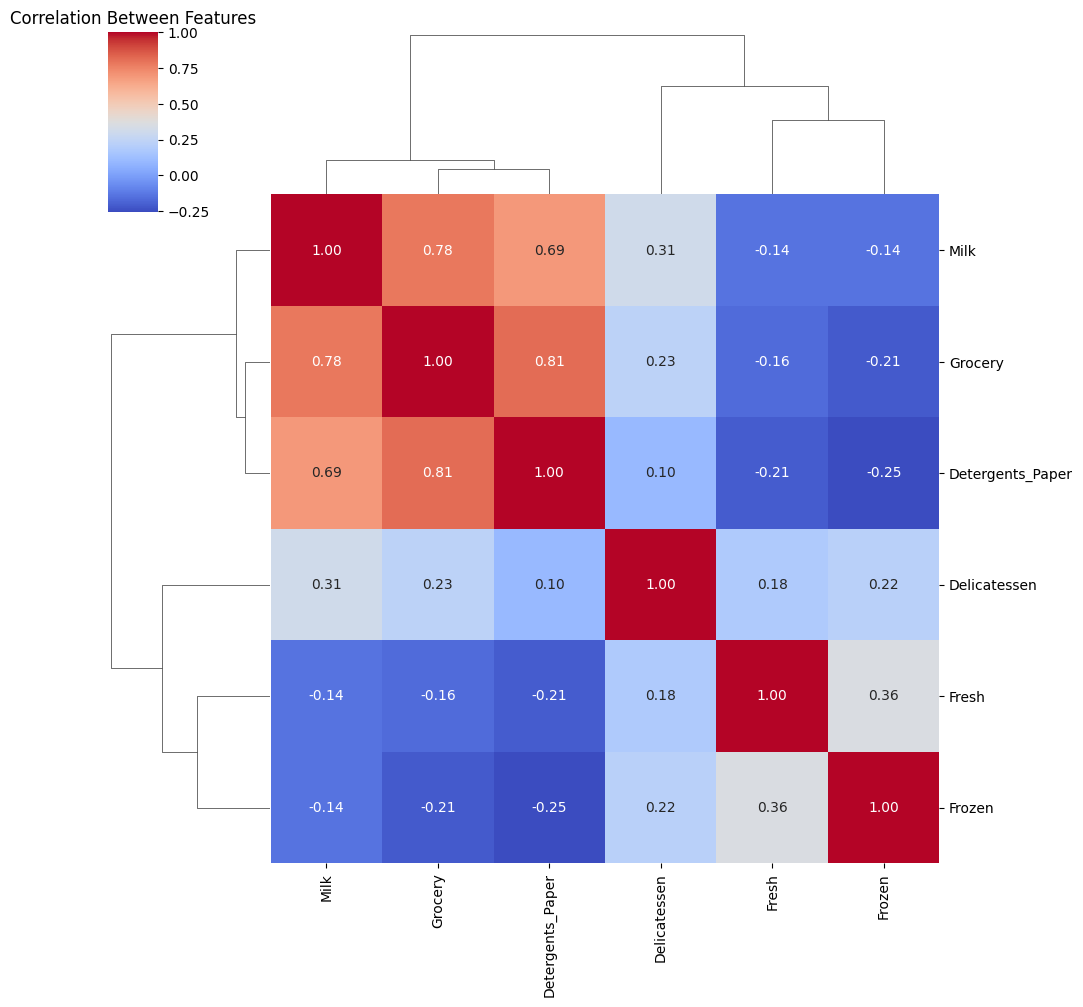

In [ ]:


correlation_matrix = filtered_data.corr()

plt.figure(figsize=(10, 8))
sns.clustermap(correlation_matrix, cmap="coolwarm", annot=True, fmt=".2f")
plt.title('Correlation Between Features')
plt.show()




Some observations:

The strongest positive correlations seem to be between 'Grocery' and 'Milk', and between 'Frozen' and 'Frozen'.
There appears to be a moderately positive correlation between 'Detergents_Paper' and 'Milk', and between 'Fresh' and 'Milk'.
'Detergents_Paper' and 'Delicatessen' have a relatively low correlation with most other features.
There are no extremely strong negative correlations observed in the matrix.


### PCA
Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the cleaned data to discover which dimensions about the data best maximize the variance of features involved.

Biplot: Visualizing Product Relationships 

In [34]:


pca = PCA(n_components=6)  


pca.fit(filtered_data)

transformed_data = pca.transform(filtered_data)


explained_variance_ratio = pca.explained_variance_ratio_


print(explained_variance_ratio)


[0.48547654 0.2379061  0.12000596 0.09815006 0.04120004 0.01726131]


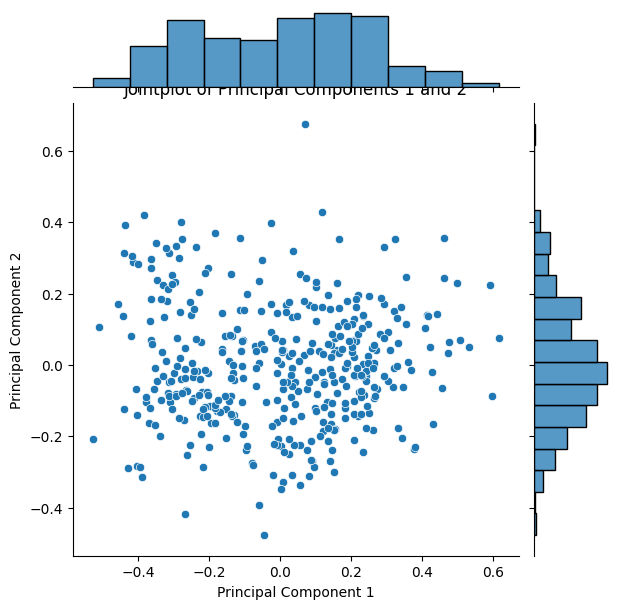

In [35]:



pc1 = transformed_data[:, 0]
pc2 = transformed_data[:, 1]


sns.jointplot(x=pc1, y=pc2, kind="scatter")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Jointplot of Principal Components 1 and 2")
plt.show()


Exploring the new Descriptors of the cleand Data using plot.bar

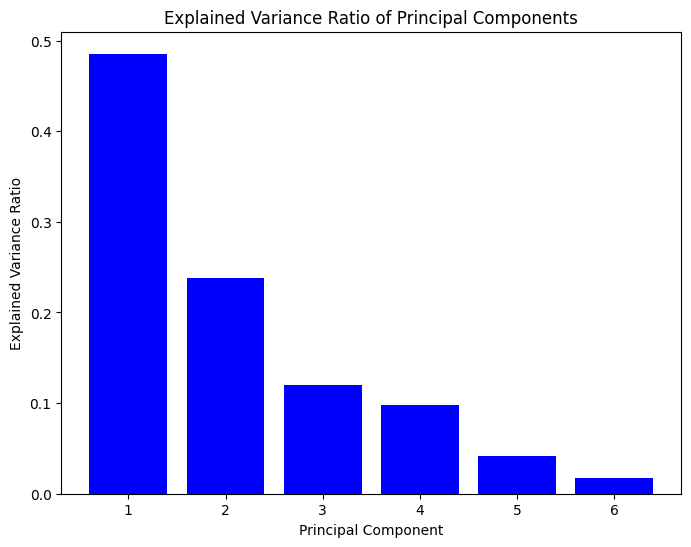

In [36]:


plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, color='blue')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio of Principal Components')
plt.xticks(range(1, len(explained_variance_ratio) + 1))
plt.show()


In [37]:

total_variance_ratio = explained_variance_ratio[0] + explained_variance_ratio[1]


print("Total explained variance ratio for the first and second principal components:", total_variance_ratio)


Total explained variance ratio for the first and second principal components: 0.7233826356415767
